In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
#Loading all Libraries:-

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb


from sklearn.ensemble import RandomForestClassifier
#from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import time
from scipy import stats
from scipy.stats import norm
from copy import deepcopy
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HealthCareAnalytics.csv',index_col=0) #importing data

In [3]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20


In [4]:
data.isna().sum() #Detect missing values

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [5]:
data.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
data.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [7]:
data.Stay.unique()


array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [8]:
data.replace(to_replace ="Nov-20", 
                 value ="11-20", inplace=True) 

In [9]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,11-20
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,11-20


In [10]:
data.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [11]:
data['Stay'].value_counts()


21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

## Features

In [12]:
data_num = data.select_dtypes(exclude='object')
data_num

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
case_id,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911
2,2,5,2,2.0,31397,7.0,2,5954
3,10,1,2,2.0,31397,7.0,2,4745
4,26,2,2,2.0,31397,7.0,2,7272
5,26,2,2,2.0,31397,7.0,2,5558
...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,3,4144
318435,24,1,2,4.0,325,8.0,4,6699
318436,7,4,3,4.0,125235,10.0,3,4235


In [13]:
data_num.patientid.value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
63360      1
85687      1
89781      1
97969      1
58524      1
Name: patientid, Length: 92017, dtype: int64

In [14]:
# patient id must be unique, so we drop this column
data_num.drop(['patientid'],axis=1, inplace=True)

In [15]:
data_num.isna().sum()

Hospital_code                           0
City_Code_Hospital                      0
Available_Extra_Rooms_in_Hospital       0
Bed_Grade                             113
City_Code_Patient                    4532
Visitors_with_Patient                   0
Admission_Deposit                       0
dtype: int64

In [16]:
data_num.Bed_Grade.value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed_Grade, dtype: int64

In [17]:
data_num.Bed_Grade.median()

3.0

In [18]:
# preprocessing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data_num.iloc[:,:] = imputer.fit_transform(data_num)

In [19]:
data_num.isna().sum()

Hospital_code                        0
City_Code_Hospital                   0
Available_Extra_Rooms_in_Hospital    0
Bed_Grade                            0
City_Code_Patient                    0
Visitors_with_Patient                0
Admission_Deposit                    0
dtype: int64

In [20]:
data_obj = data.select_dtypes(include='object')
data_obj

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
case_id,,,,,,,,,
1,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60,0-10
2,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60,41-50
3,e,X,anesthesia,S,E,Trauma,Extreme,51-60,31-40
4,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60,41-50
5,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60,41-50
...,...,...,...,...,...,...,...,...,...
318434,a,X,radiotherapy,Q,F,Emergency,Moderate,41-50,11-20
318435,a,X,anesthesia,Q,E,Urgent,Moderate,81-90,31-40
318436,a,X,gynecology,R,F,Emergency,Minor,71-80,11-20


In [21]:
data_obj.isna().sum()

Hospital_type_code      0
Hospital_region_code    0
Department              0
Ward_Type               0
Ward_Facility_Code      0
Type_of_Admission       0
Severity_of_Illness     0
Age                     0
Stay                    0
dtype: int64

In [22]:
#droping nan value 
## Stay column consist only one nan value 
data_obj.dropna(inplace=True)

In [23]:
data_obj.isna().sum()

Hospital_type_code      0
Hospital_region_code    0
Department              0
Ward_Type               0
Ward_Facility_Code      0
Type_of_Admission       0
Severity_of_Illness     0
Age                     0
Stay                    0
dtype: int64

In [24]:
# Encoding object type data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_obj.iloc[:,:] = data_obj.iloc[:,:].apply(label.fit_transform)
data_obj

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
case_id,,,,,,,,,
1,2,2,3,2,5,0,0,5,0
2,2,2,3,3,5,1,0,5,4
3,4,0,1,3,4,1,0,5,3
4,1,1,3,2,3,1,0,5,4
5,1,1,3,3,3,1,0,5,4
...,...,...,...,...,...,...,...,...,...
318434,0,0,3,1,5,0,2,4,1
318435,0,0,1,1,4,2,2,8,3
318436,0,0,2,2,5,0,1,7,1


In [25]:
df = pd.concat([data_num,data_obj],axis=1)
df.head()

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Visitors_with_Patient,Admission_Deposit,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
case_id,,,,,,,,,,,,,,,,
1,8.0,3.0,3.0,2.0,7.0,2.0,4911.0,2,2,3,2,5,0,0,5,0
2,2.0,5.0,2.0,2.0,7.0,2.0,5954.0,2,2,3,3,5,1,0,5,4
3,10.0,1.0,2.0,2.0,7.0,2.0,4745.0,4,0,1,3,4,1,0,5,3
4,26.0,2.0,2.0,2.0,7.0,2.0,7272.0,1,1,3,2,3,1,0,5,4
5,26.0,2.0,2.0,2.0,7.0,2.0,5558.0,1,1,3,3,3,1,0,5,4


In [26]:
df.isna().sum()

Hospital_code                        0
City_Code_Hospital                   0
Available_Extra_Rooms_in_Hospital    0
Bed_Grade                            0
City_Code_Patient                    0
Visitors_with_Patient                0
Admission_Deposit                    0
Hospital_type_code                   0
Hospital_region_code                 0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Type_of_Admission                    0
Severity_of_Illness                  0
Age                                  0
Stay                                 0
dtype: int64

In [68]:
#Counting Hospital Type Code
df['Hospital_type_code'].value_counts()

0    143425
1     68946
2     45928
4     24770
3     20389
5     10703
6      4277
Name: Hospital_type_code, dtype: int64

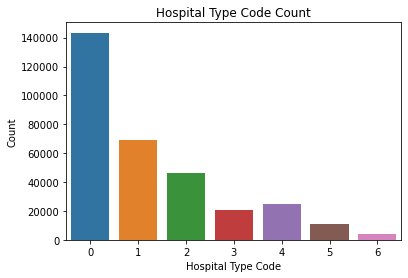

In [69]:
#Counting Hospital Type Code
sns.countplot(x='Hospital_type_code',data=df)
plt.xlabel("Hospital Type Code")
plt.ylabel("Count")
plt.title("Hospital Type Code Count")
plt.show()

In [70]:
#Counting City Code Hospital
df['City_Code_Hospital'].value_counts()

1.0     55351
2.0     51809
6.0     46991
7.0     35463
3.0     31569
5.0     31105
9.0     26277
11.0    17137
4.0     13857
10.0     5249
13.0     3630
Name: City_Code_Hospital, dtype: int64

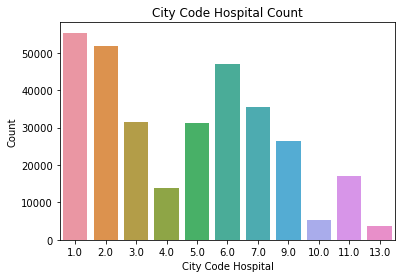

In [71]:
#Counting Hospital Type Code
sns.countplot(x='City_Code_Hospital',data=df)
plt.xlabel("City Code Hospital")
plt.ylabel("Count")
plt.title("City Code Hospital Count")
plt.show()

In [72]:
#Counting Hospital Region Code
df['Hospital_region_code'].value_counts()

0    133336
1    122428
2     62674
Name: Hospital_region_code, dtype: int64

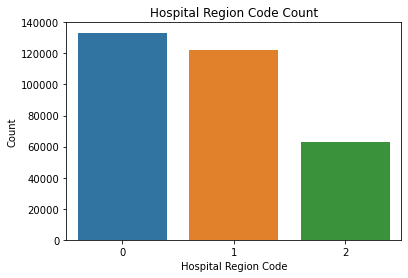

In [73]:
#Counting Hospital Region Code
sns.countplot(x='Hospital_region_code',data=df)
plt.xlabel("Hospital Region Code")
plt.ylabel("Count")
plt.title("Hospital Region Code Count")
plt.show()


In [74]:
#Counting Hospital Region Code
df['Available_Extra_Rooms_in_Hospital'].value_counts()

2.0     98311
4.0     91709
3.0     91520
5.0     19288
6.0      7786
1.0      5582
7.0      2876
8.0      1027
9.0       218
10.0       67
11.0       17
0.0        15
12.0       13
21.0        3
13.0        2
20.0        2
14.0        1
24.0        1
Name: Available_Extra_Rooms_in_Hospital, dtype: int64

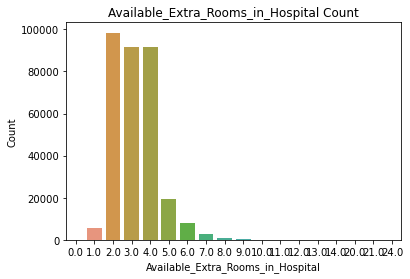

In [75]:
#Counting Available Extra Rooms in Hospital
sns.countplot(x='Available_Extra_Rooms_in_Hospital',data=df)
plt.xlabel("Available_Extra_Rooms_in_Hospital")
plt.ylabel("Count")
plt.title("Available_Extra_Rooms_in_Hospital Count")
plt.show()

In [76]:
#Counting Department
df['Department'].value_counts()

2    249486
1     29649
3     28516
0      9586
4      1201
Name: Department, dtype: int64

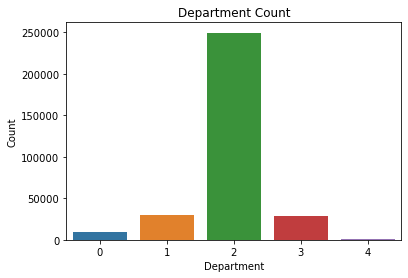

In [77]:
#Counting Department
sns.countplot(x='Department',data=df)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Count")
plt.show()

In [78]:
#Counting Ward Type
df['Ward_Type'].value_counts()

2    127947
1    106165
3     77794
0      5046
4      1477
5         9
Name: Ward_Type, dtype: int64

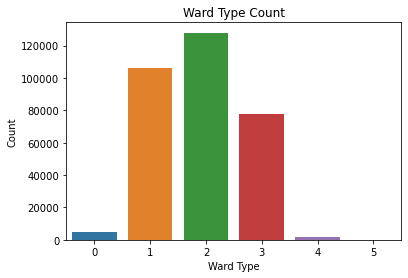

In [79]:
#Counting Ward Type
sns.countplot(x='Ward_Type',data=df)
plt.xlabel("Ward Type")
plt.ylabel("Count")
plt.title("Ward Type Count")
plt.show()

In [80]:
#Counting Ward Facility Code
df['Ward_Facility_Code'].value_counts()

5    112753
4     55351
3     51809
2     35463
1     35156
0     27906
Name: Ward_Facility_Code, dtype: int64

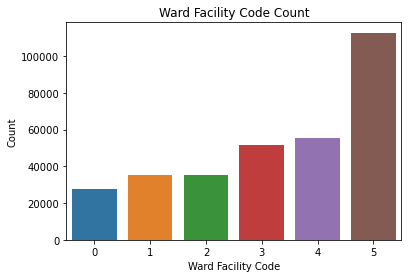

In [81]:
#Counting Ward Facility Code
sns.countplot(x='Ward_Facility_Code',data=df)
plt.xlabel("Ward Facility Code")
plt.ylabel("Count")
plt.title("Ward Facility Code Count")
plt.show()

In [82]:
#Counting Bed Grade
df['Bed_Grade'].value_counts()


2.0    123671
3.0    110696
4.0     57566
1.0     26505
Name: Bed_Grade, dtype: int64

In [83]:
#Counting Type of Admission
df['Type_of_Admission'].value_counts()

1    152261
0    117676
2     48501
Name: Type_of_Admission, dtype: int64

In [84]:
#Counting Severity of Illness
df['Severity_of_Illness'].value_counts()

2    175843
1     85872
0     56723
Name: Severity_of_Illness, dtype: int64

In [85]:
#Counting Age
df['Age'].value_counts()

4    63749
3    63639
5    48514
2    40843
7    35792
6    33687
1    16768
8     7890
0     6254
9     1302
Name: Age, dtype: int64

In [86]:
#Counting admission Deposit Price
df['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

case_id
1         0
2         4
3         3
4         4
5         4
         ..
318434    1
318435    3
318436    1
318437    1
318438    0
Name: Stay, Length: 318438, dtype: int32

In [28]:
y.value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

## Random Over sampler

In [29]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_sample(X, y)
X_smote.shape, y_smote.shape 

((962401, 15), (962401,))

In [30]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 87491, 4: 87491, 3: 87491, 1: 87491, 5: 87491, 2: 87491, 7: 87491, 10: 87491, 8: 87491, 6: 87491, 9: 87491})


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.20,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
predict = model1.predict(X_test)


In [33]:
predict

array([ 7.03, 10.  ,  0.1 , ..., 10.  ,  9.  ,  6.  ])

In [34]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test,predict))

r2_score: 0.9572328881956232


In [43]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
predict1 = model2.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test,predict1))
print('confusion_matrix:\n',confusion_matrix(y_test,predict1))
print(classification_report(y_test,predict1))

accuracy_score: 0.8636540749476572
confusion_matrix:
 [[16890   276   207    52    11     8     7     0     0     0     2]
 [ 1651  8850  4409  1427   312   690    30    95    22     7    30]
 [ 1446  4858  7971  1938   622   538    80    85    50    15    44]
 [  405  1268  1966 11784   227  1576    31   190    46    19    39]
 [    3     4    23     2 17482     0     0     0     0     0     0]
 [   86   181   236   603    38 15815     9   184    91    27    56]
 [    0     0     0     0     0     0 17575     0     0     0     0]
 [    0     0     0     1     0     6     0 17364     0     0     6]
 [    0     0     0     0     0     0     0     0 17503     0     0]
 [    0     0     0     0     0     0     0     0     0 17389     0]
 [    0     0     0     0     0     1     8     0     0     0 17614]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     17453
           1       0.57      0.51      0.54     17523
           2       0.54

In [45]:
df['predict']=model2.predict(X)
df.tail(20)

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Visitors_with_Patient,Admission_Deposit,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay,predict
case_id,,,,,,,,,,,,,,,,,
318419,17.0,1.0,2.0,4.0,32.0,2.0,4499.0,4,0,2,2,4,2,1,3,0,0
318420,16.0,3.0,1.0,4.0,6.0,2.0,4339.0,2,2,2,3,0,1,2,4,3,5
318421,3.0,3.0,3.0,3.0,20.0,2.0,4667.0,2,2,1,1,0,2,2,7,1,1
318422,19.0,7.0,2.0,2.0,8.0,2.0,4277.0,0,1,2,3,2,0,2,4,0,0
318423,22.0,9.0,3.0,2.0,23.0,3.0,4510.0,6,1,1,2,1,0,1,4,0,0
318424,23.0,6.0,2.0,4.0,1.0,2.0,3190.0,0,0,1,1,5,2,2,3,1,1
318425,6.0,6.0,2.0,4.0,2.0,2.0,4455.0,0,0,3,2,5,2,2,5,1,1
318426,15.0,5.0,2.0,4.0,12.0,2.0,8052.0,2,2,1,3,5,0,1,1,1,1
318427,17.0,1.0,3.0,4.0,32.0,3.0,4185.0,4,0,2,2,4,0,1,0,0,1


In [46]:
# without balancing the data we got 40% accuracy for classification
# 47 % r2_score for regression

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier()
model3.fit(X_train, y_train)

ExtraTreesClassifier()

In [48]:
predict2 = model3.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test,predict2))
print('confusion_matrix:\n',confusion_matrix(y_test,predict2))
print(classification_report(y_test,predict2))

accuracy_score: 0.8643398569209428
confusion_matrix:
 [[16821   295   259    48    12    10     4     2     0     0     2]
 [ 1191  8883  4800  1620   266   591    32    91    12     9    28]
 [ 1032  5076  8162  2115   499   523    79    84    38     9    30]
 [  307  1462  2103 11861   164  1373    34   155    42    21    29]
 [    3     8    17     4 17482     0     0     0     0     0     0]
 [   47   259   278   692    30 15715     8   160    70    17    50]
 [    0     0     0     0     0     0 17575     0     0     0     0]
 [    0     0     2     1     1     4     0 17363     0     0     6]
 [    0     0     0     0     0     0     0     0 17503     0     0]
 [    0     0     0     0     0     0     0     0     0 17389     0]
 [    0     0     0     0     0     0     8     0     0     0 17615]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     17453
           1       0.56      0.51      0.53     17523
           2       0.52

# Conclusion

* By using XGBoost, logistic regression, KNN algorithms in this data set show poor accuracy of around 45%
* As this data set have more missing values, initially this data set is preprocessed and removed the all missing values by simple imputer using median strategy at some point it shows 1 missing values in stay so it is droped.
* Label encoder is used to convert the text data into numbers
* By discussing with the data mites team used the regression algorithm and checked with accuracy score. By using random over sampler got the R2_score of 0.95.
* By using the Random forest classifier and extra tree classifier method got accuracy of 0.86 and hence it is found that Random over sampler, Random forest classifier and Extra tree classifier shows the better performance in this data